In [1]:

from ModelTrainer import ModelTrainer
import torchvision
from torchvision.models.resnet import resnet50, ResNet50_Weights, resnet18, ResNet18_Weights, resnet101, ResNet101_Weights 
from torchvision.models import swin_v2_b ,Swin_V2_B_Weights
import torchvision.models as models
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Check GPU support on your machine.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)
%load_ext autoreload
%autoreload 2

cuda:0


In [2]:
#specify path to augementation folder
dir = r"F:\Users\basti\Documents\Goethe Uni\Data Challange\multimodal"
df = pd.read_csv(dir+"\\datasettypes2.csv", delimiter=',', skiprows=0, low_memory=False, encoding='iso-8859-1')

unique_classes = df["class"].unique()
print("Number of Classes with samples", len(unique_classes))

class_map = { geo: i for i, geo in enumerate(unique_classes)}

df["class_index"] = df.apply(lambda x: class_map[x["class"]], axis=1)

df[["filename", "image_name","class", "class_index"]].to_csv(dir+"\\datasettypes2.csv", index=False)

Number of Classes with samples 95


In [2]:
# Read the CSV file using pandas
df = pd.read_csv('val1.csv')

# Initialize an empty list to store the embeddings
embeddings = []
print(len(df['class_index'].unique()))

78


In [8]:

#specify path to multimodal folder
dir = r"F:\Users\basti\Documents\Goethe Uni\Data Challange\multimodal"

##########################################
####use split dataset first on copy of cleaned dataset


#############################
#traindataset
ROOT_DIR = r"F:\Users\basti\Documents\Goethe Uni\Data Challange\CN_dataset_04_23\dataset_coins_train"
#val dataset
ROOT_DIR2 = r"F:\Users\basti\Documents\Goethe Uni\Data Challange\CN_dataset_04_23\dataset_coins_val"


df_csv = pd.read_csv(dir+"\\datasettypes2.csv", delimiter=',', skiprows=0, low_memory=False, encoding='iso-8859-1')


def get_filenames(directory):
    """Get every filename in a given directory"""
    filenames = []
    for root, _, files in os.walk(directory):
        for file in files:
            filenames.append(os.path.join(root, file))
            
    info = []
    for filename in filenames:
        class_folder, image_name = os.path.split(filename)
        info.append(image_name)
    
    return pd.DataFrame({'image_name': info})

df_filenames_train = get_filenames(ROOT_DIR)
df_filenames_val = get_filenames(ROOT_DIR2)




df_filtered_train = pd.merge(df_csv, df_filenames_train, on='image_name')
df_filtered_val = pd.merge(df_csv, df_filenames_val, on='image_name')

df_filtered_train.to_csv(dir+"\\train.csv", index=False)
df_filtered_val.to_csv(dir+"\\val.csv", index=False)

train = dir+"\\train.csv"
val = dir+"\\val.csv"


In [3]:
import pandas as pd

def remap_class_indices(file):
    # Load CSV file into a pandas DataFrame
    df = pd.read_csv(file)

    # Build a mapping from old class indices to new ones
    unique_classes = df['class_index'].unique()
    class_mapping = {cls: index for index, cls in enumerate(unique_classes)}

    # Use this mapping to replace old class indices with new ones
    df['class_index'] = df['class_index'].map(class_mapping)

    # Save your DataFrame back to a CSV file
    
    df.to_csv(file, index=False)

    # Return the new file path and the class mapping for future reference
    return class_mapping

train_map = remap_class_indices('train1.csv')
val_map = remap_class_indices('val1.csv')

In [4]:
import numpy as np
embedding = np.load('embeddings.npy')
print(embedding.shape)
embedding_val = np.load('embeddings_val.npy')
print(embedding_val.shape)
embedding[0] == embedding[11]

(2060, 1536)
(654, 1536)


array([ True,  True,  True, ...,  True,  True,  True])

In [6]:
dir = r"F:\Users\basti\Documents\Goethe Uni\Data Challange\multimodal"

train_augmentations = transform = transforms.Compose([
    transforms.ToTensor(),  # convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # normalize images
    transforms.Resize((299, 299))
])


"""
# Define the data transformation
train_transform1 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),  # convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # normalize images
    transforms.Resize((299, 299))
])
# Define the data transformation
train_transform2 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),  # convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # normalize images
    transforms.Resize((299, 299))
])
])
# Define the data transformation
train_transform3 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),  # convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # normalize images
    transforms.Resize((299, 299))
])
train_transform4 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),  # convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # normalize images
    transforms.Resize((299, 299))
])
# Define the data transformation
train_transform5 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop((512,1536)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),  # convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # normalize images
    transforms.Resize((299, 299))
])
"""
train = dir+"\\train1.csv"
val = dir+"\\val1.csv"


df = pd.read_csv(train, delimiter=',', skiprows=0, low_memory=False, encoding='iso-8859-1')

unique_classes = df["class"].unique()

model = models.resnet18(weights=ResNet18_Weights.DEFAULT)


model.fc = nn.Linear(model.fc.in_features, len(unique_classes))

#model = swin_v2_b(weights=Swin_V2_B_Weights.DEFAULT)

#model.head= nn.Linear(model.head.in_features, len(unique_classes))
dir = r"F:\Users\basti\Documents\Goethe Uni\Data Challange\multimodal"
model_save_path = r"F:\Users\basti\Documents\Goethe Uni\Data Challange\models"


Solver = ModelTrainer(model=model,  
            train_path=train, 
            val_path=val, 
            train_augmentations=train_augmentations,
            save_path=model_save_path,
            postfix='TR0_Res18_types_with_des_79',
            batch_size=16
            )

cuda
2060
torch.Size([16, 3, 299, 299]) torch.Size([16, 78]) torch.Size([16, 1536])
data loaded


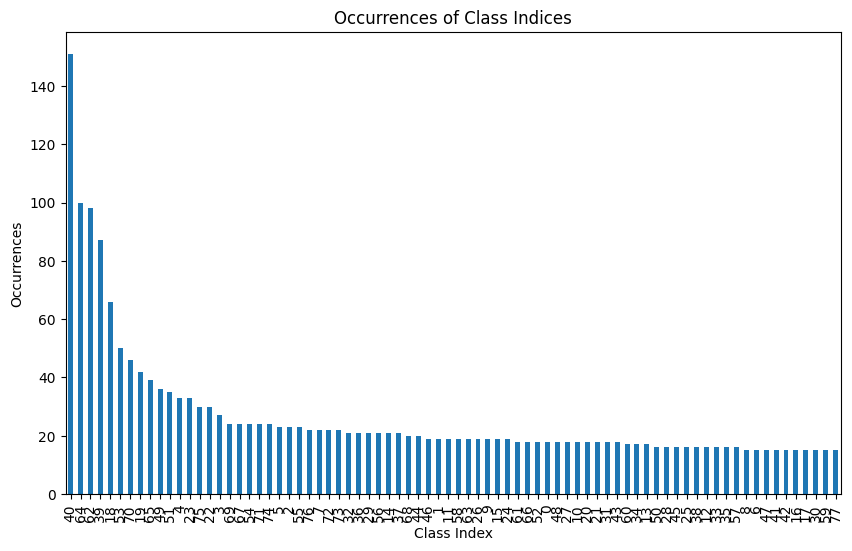

In [7]:
# equalize classes because labels are equal anyway

df = pd.read_csv(train, delimiter=',', skiprows=0, low_memory=False, encoding='iso-8859-1')

# Count the occurrences of each class index
class_counts = df['class_index'].value_counts()

# Create a bar plot to visualize the occurrences
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class Index')
plt.ylabel('Occurrences')
plt.title('Occurrences of Class Indices')
plt.show()

# Get the unique values of the class indices column
unique_class_indices = df['class_index'].unique()

# Create a new DataFrame with the unique class indices
new_data = pd.DataFrame({'class_index': unique_class_indices})

# Merge the new DataFrame with the original DataFrame to keep the values for other columns
new_data = pd.merge(new_data, df.drop_duplicates(subset=['class_index']), on='class_index')

column_order = ['filename', 'image_name', 'class', 'class_index', 'description']
new_data = new_data[column_order]

# Save the new DataFrame to a new CSV file
new_data.to_csv('new_file.csv', index=False)

In [12]:
#Solver.load(r"F:\Users\basti\Documents\Goethe Uni\Data Challange\models\modelTR0_Res18_sophia.tar")
Solver.train()


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10
----------


KeyboardInterrupt: 

In [60]:
#trained image encoder

class MLP(nn.Module):
    def __init__(self, model_path, input_size=2048, hidden_size=1000, output_size=78):
        super().__init__()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        #init embedding model
        self.visual_embedding_model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        
        self.visual_embedding_model.fc = nn.Linear(self.visual_embedding_model.fc.in_features, 78)
        checkpoint = torch.load(model_path)
        self.visual_embedding_model.load_state_dict(checkpoint.pop('model'))
        
        # we do not want to overwrite weights for the visual embedding model
        for param in self.visual_embedding_model.parameters():
            param.requires_grad = False
            
        self.visual_embedding_model.fc = nn.Linear(512, 512)
        self.visual_embedding_model = self.visual_embedding_model.to(self.device)
        #init fusion layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # we have to get a visual embedding first
        
        visual_embedding = self.visual_embedding_model(x['image'].to(self.device, non_blocking=True).type_as(next(self.parameters())))
        
        x['text_embedding'] = x['text_embedding'].to(dtype=torch.float32)
        #simple fusion via conactention
        x = torch.cat((x['text_embedding'].to(self.device, non_blocking=True), visual_embedding), dim=1)
        
        # simple MLP
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [67]:
#train everything from scratch

class MLP(nn.Module):
    def __init__(self, model_path, input_size=2048, hidden_size=1000, output_size=78):
        super().__init__()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        #init embedding model
        self.visual_embedding_model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        
        self.visual_embedding_model.fc = nn.Linear(512, 512)
        
        #init fusion layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # we have to get a visual embedding first
        
        visual_embedding = self.visual_embedding_model(x['image'].to(self.device, non_blocking=True).type_as(next(self.parameters())))
        
        x['text_embedding'] = x['text_embedding'].to(dtype=torch.float32)
        #simple fusion via conactention
        x = torch.cat((x['text_embedding'].to(self.device, non_blocking=True), visual_embedding), dim=1)
        
        # simple MLP
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [18]:
class TextClassefier(nn.Module):
    def __init__(self, model_path, input_size=1536, hidden_size=10000, output_size=78):
        super().__init__()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        
        #init fusion layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        # we have to get a visual embedding first
        
        
        
        x['text_embedding'] = x['text_embedding'].to(dtype=torch.float32)
        
        
        
        # simple MLP
        x = self.dropout(self.fc1(x['text_embedding'].to(self.device, non_blocking=True)))
        
        x = self.relu(x)
        x = self.dropout(self.fc2(x))
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [98]:
import torch
from torch import nn
from torch.nn import TransformerEncoder, TransformerEncoderLayer

class TextClassifier(nn.Module):
    def __init__(self, model_path, input_size=1536, hidden_size=1000, output_size=78, nhead=8, num_layers=4):
        super().__init__()
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Transformer encoder layer
        self.encoder_layer = TransformerEncoderLayer(d_model=input_size, nhead=nhead)
        self.transformer_encoder = TransformerEncoder(self.encoder_layer, num_layers=num_layers)

        # Output layer
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x['text_embedding'] = x['text_embedding'].to(dtype=torch.float32)

        # Transform input to required shape (L, N, E) where L is the sequence length, N is the batch size, E is the feature number
        x = x['text_embedding'].permute(1, 0, 2).to(self.device, non_blocking=True)

        # Pass through Transformer encoder
        x = self.transformer_encoder(x)

        # Aggregate the output if needed, e.g., taking the mean over sequence length
        x = x.mean(dim=0)

        # Pass through final fully connected layer
        x = self.fc(x)

        return x

In [19]:
train = dir+"\\new_file.csv"
model = TextClassefier(r"F:\Users\basti\Documents\Goethe Uni\Data Challange\models\modelTR0_Res18_types_with_des_79.tar")
Solver = ModelTrainer(model=model,  
            train_path=train, 
            val_path=val, 
            train_augmentations=train_augmentations,
            save_path=model_save_path,
            postfix='TR0_Res18_types_with_des_78_textclassefier',
            batch_size=4,
            )

cuda
78
torch.Size([4, 3, 299, 299]) torch.Size([4, 78]) torch.Size([4, 1536])
data loaded


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10
----------
train Loss: 4.3895 Acc: 0.0000
train Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


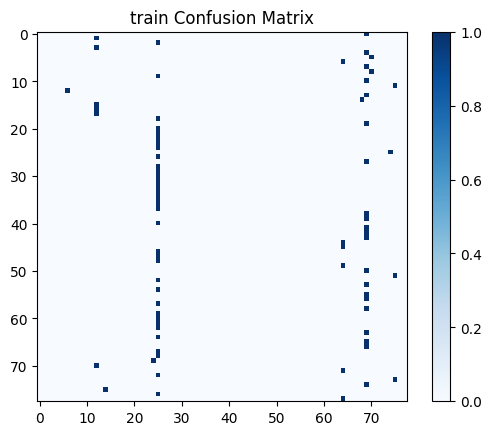

val Loss: 4.3517 Acc: 0.0183
val Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


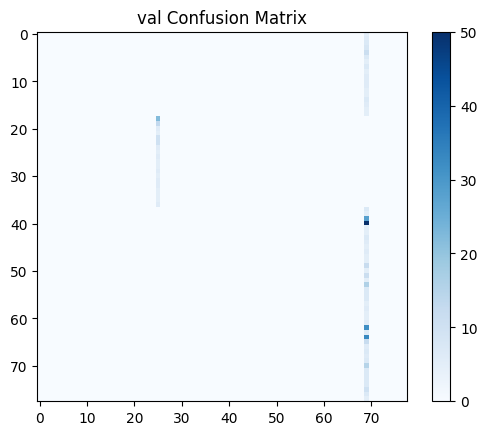


Epoch 2/10
----------
train Loss: 4.3715 Acc: 0.0000
train Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


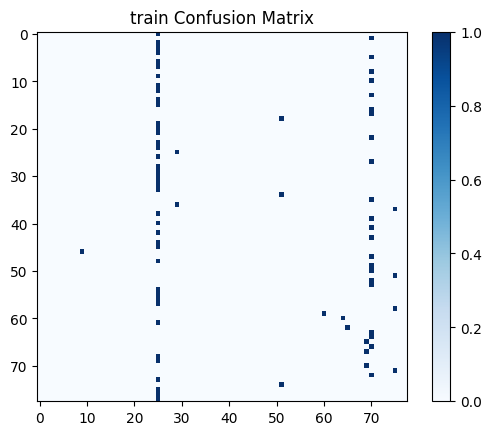

val Loss: 4.3498 Acc: 0.0306
val Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


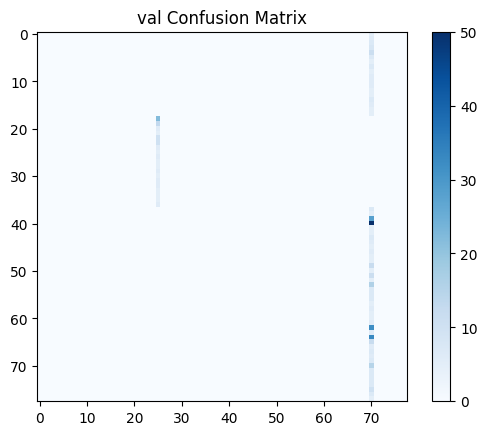


Epoch 3/10
----------
train Loss: 4.3622 Acc: 0.0128
train Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


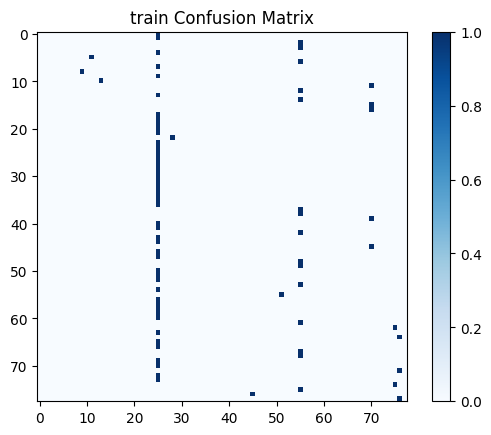

val Loss: 4.3462 Acc: 0.0489
val Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


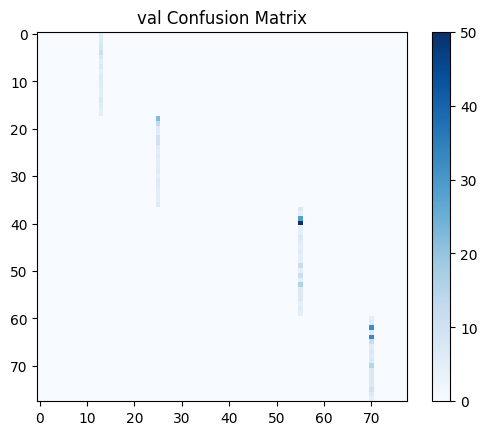


Epoch 4/10
----------
train Loss: 4.3554 Acc: 0.0000
train Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


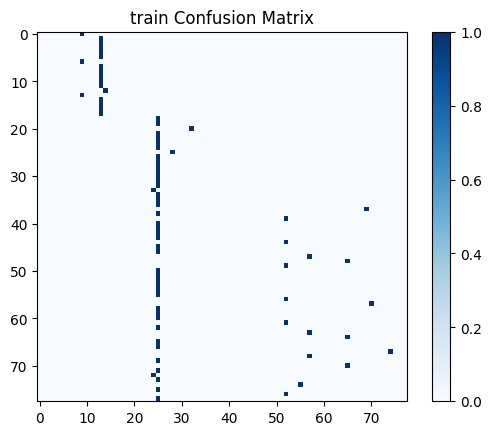

val Loss: 4.3365 Acc: 0.0336
val Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


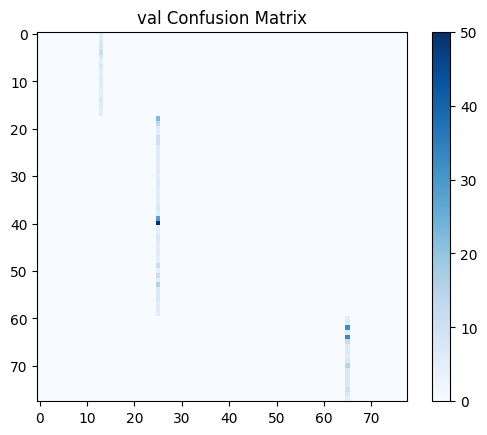


Epoch 5/10
----------
train Loss: 4.3365 Acc: 0.0256
train Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


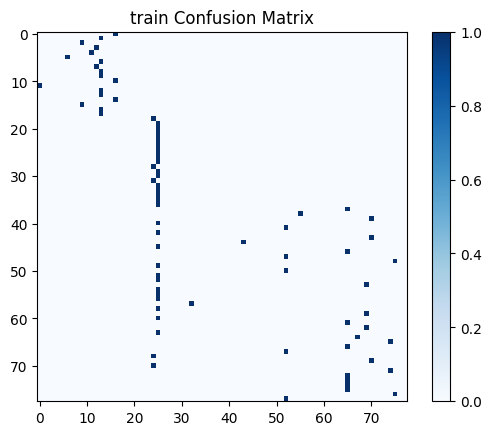

val Loss: 4.3280 Acc: 0.0336
val Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


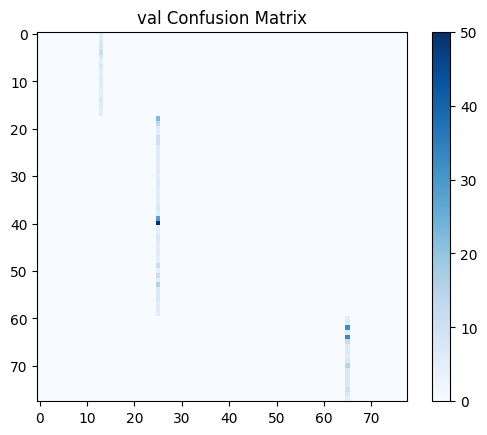


Epoch 6/10
----------
train Loss: 4.3266 Acc: 0.0128
train Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


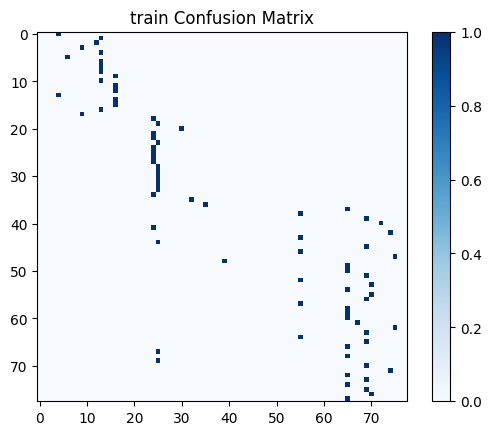

val Loss: 4.3121 Acc: 0.0459
val Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


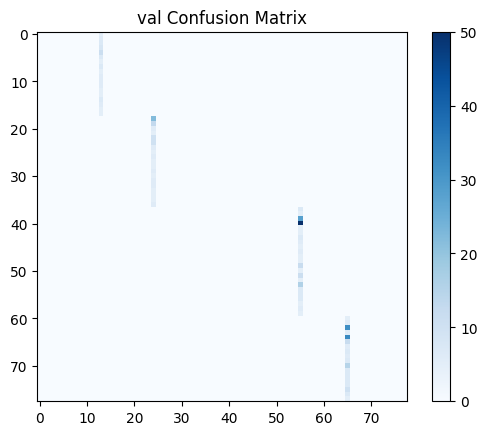


Epoch 7/10
----------
train Loss: 4.3096 Acc: 0.0128
train Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


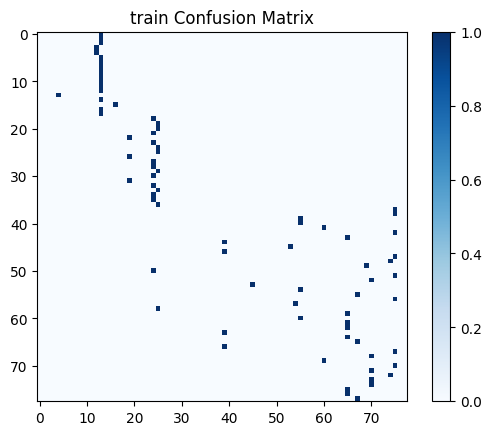

val Loss: 4.2911 Acc: 0.0443
val Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


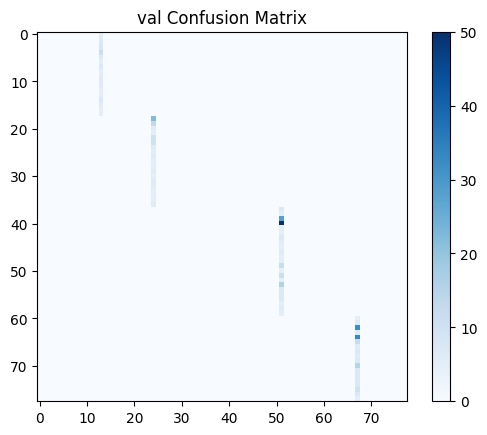


Epoch 8/10
----------
train Loss: 4.2790 Acc: 0.0128
train Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


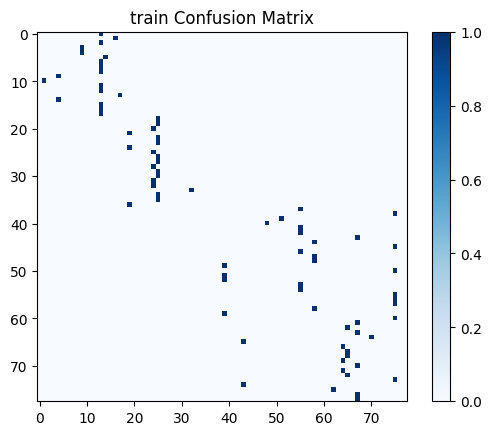

val Loss: 4.2611 Acc: 0.0413
val Confusion Matrix: 
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  5  0  0]]


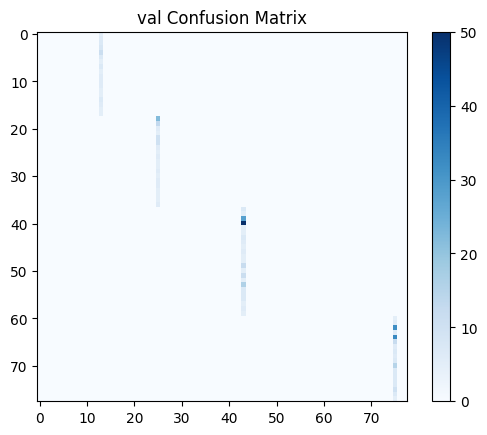


Epoch 9/10
----------


In [20]:
Solver.train(mulitmodal=True)

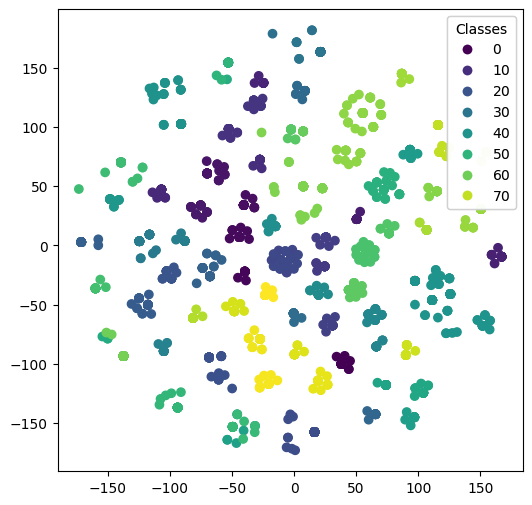

In [8]:
from sklearn.manifold import TSNE
# let's assume embeddings is your numpy array of shape (n_samples, n_features)
embeddings = np.load('embeddings.npy')  # replace this with your actual embeddings
labels = np.random.randint(0, 78, 2060)
labels = df['class_index']
# perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

# visualize the results
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis')

# create legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

In [87]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

c:\Users\basti\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\basti\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [93]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,